In [1]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Rainfall Data Import

In [3]:
from IPython.display import FileLink

upload = FileLink("Manaus-rainfall.csv")
print(f"User file uploaded file: {upload}")

df_rainfall= pd.read_csv("Manaus-rainfall.csv")
df_rainfall.shape

User file uploaded file: e:\Github\cse-2100-project\Manaus-rainfall.csv


(6940, 2)

In [4]:
df_rainfall.head()


,time,rain_sum (mm)
0,2000-01-01,17.7
1,2000-01-02,8.7
2,2000-01-03,26.6
3,2000-01-04,4.9
4,2000-01-05,3.7


In [5]:
#df_rainfall.tail()

In [6]:
df_rainfall.describe() 

,rain_sum (mm)
count,6940.000000
mean,7.459308
std,9.015213
min,0.000000
25%,1.200000
50%,5.000000
75%,10.700000
max,130.300000


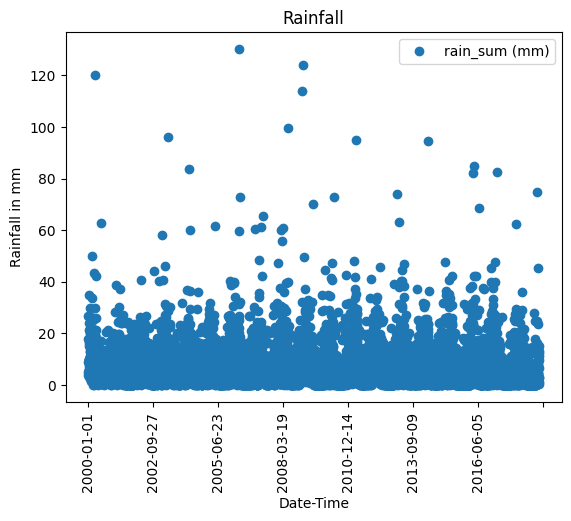

In [7]:
df_rainfall.plot(x='time', y='rain_sum (mm)', style='o')
plt.xticks(rotation=90)
plt.title('Rainfall')  
plt.xlabel('Date-Time')  
plt.ylabel('Rainfall in mm')  
plt.show() 

# River Discharge Data Input

In [8]:
from IPython.display import FileLink

upload = FileLink("Manaus-River-discharge.csv")
print(f"User file uploaded: {upload}")
df_riverdis = pd.read_csv("Manaus-River-discharge.csv")
df_riverdis.shape

User file uploaded: e:\Github\cse-2100-project\Manaus-River-discharge.csv


(6940, 2)

In [9]:
df_riverdis.head()

,time,river_discharge (m³/s)
0,2000-01-01,2.44
1,2000-01-02,2.34
2,2000-01-03,4.00
3,2000-01-04,2.17
4,2000-01-05,1.70


In [10]:
df_riverdis.describe() 

,river_discharge (m³/s)
count,6940.000000
mean,2.060624
std,1.563391
min,0.320000
25%,0.970000
50%,1.720000
75%,2.750000
max,27.440000


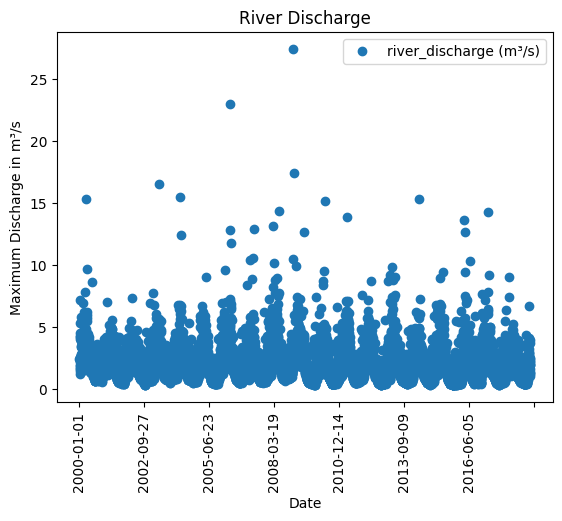

In [11]:
df_riverdis.plot(x='time', y='river_discharge (m³/s)', style='o')  
plt.xticks(rotation=90)
plt.title('River Discharge')  
plt.xlabel('Date')  
plt.ylabel('Maximum Discharge in m³/s')  
plt.show()  

# Mearging Datasets

In [12]:
df=pd.merge(df_rainfall, df_riverdis, how = 'outer', on=['time'])
df.shape

(6940, 3)

In [13]:
df.head()

,time,rain_sum (mm),river_discharge (m³/s)
0,2000-01-01,17.7,2.44
1,2000-01-02,8.7,2.34
2,2000-01-03,26.6,4.00
3,2000-01-04,4.9,2.17
4,2000-01-05,3.7,1.70


Handling missing values

In [14]:
df['rain_sum (mm)'] = df['rain_sum (mm)'].fillna(0)
df['river_discharge (m³/s)'] = df['river_discharge (m³/s)'].fillna(0)

df.head()

,time,rain_sum (mm),river_discharge (m³/s)
0,2000-01-01,17.7,2.44
1,2000-01-02,8.7,2.34
2,2000-01-03,26.6,4.00
3,2000-01-04,4.9,2.17
4,2000-01-05,3.7,1.70


Combined Plot

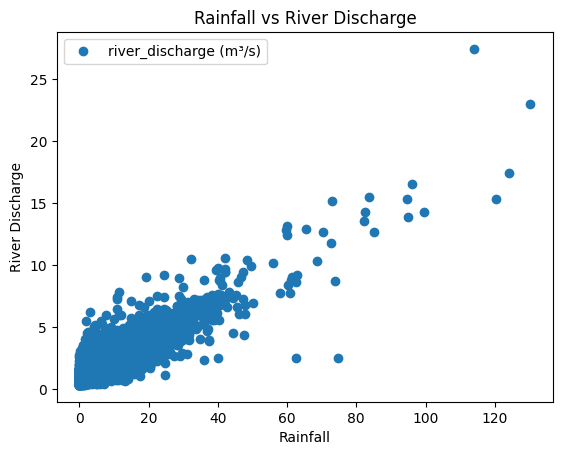

In [15]:
df.plot(x='rain_sum (mm)', y='river_discharge (m³/s)', style='o')  
plt.title('Rainfall vs River Discharge')  
plt.xlabel('Rainfall')  
plt.ylabel('River Discharge')  
plt.show()  

In [16]:
df.shape

(6940, 3)

In [17]:
X=df.iloc[:, 1:2].values
Y=df.iloc[:, 2:3].values

In [18]:
print(X)
print(Y)

[[17.7]
 [ 8.7]
 [26.6]
 ...
 [ 0.3]
 [ 1.1]
 [11.1]]
[[2.44]
 [2.34]
 [4.  ]
 ...
 [1.34]
 [0.99]
 [1.22]]


# Splitting Datasets

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [20]:
#print(X_train)

In [21]:
#print(Y_train)
Y_train.shape

(5552, 1)

In [22]:
#print(X_test)

In [23]:
#print(Y_test)
Y_test.shape

(1388, 1)

# Linear Regression: Training the Model and Testing

In [24]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [25]:
print(regressor.intercept_)

[0.94167029]


In [26]:
print(regressor.coef_)

[[0.15001313]]


Visualize the training set results

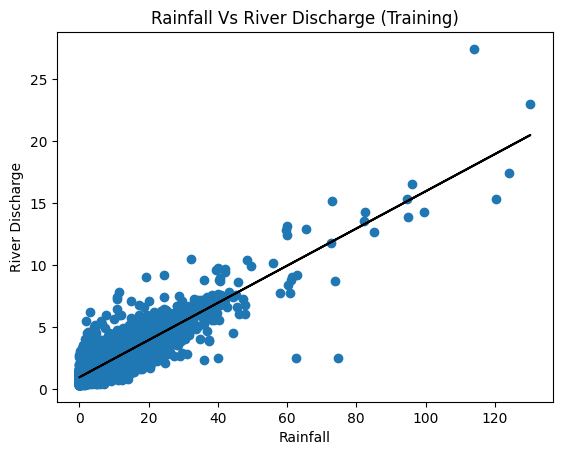

In [27]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Rainfall Vs River Discharge (Training)')
plt.xlabel('Rainfall')
plt.ylabel('River Discharge')
plt.show()

Predicting

In [28]:
Y_predict= regressor.predict(X_test)
print(Y_predict)
Y_predict.shape

[[1.61672936]
 [3.7919197 ]
 [2.26178581]
 ...
 [3.40188557]
 [2.68182256]
 [4.43697615]]


(1388, 1)

Visualising the Test set Result

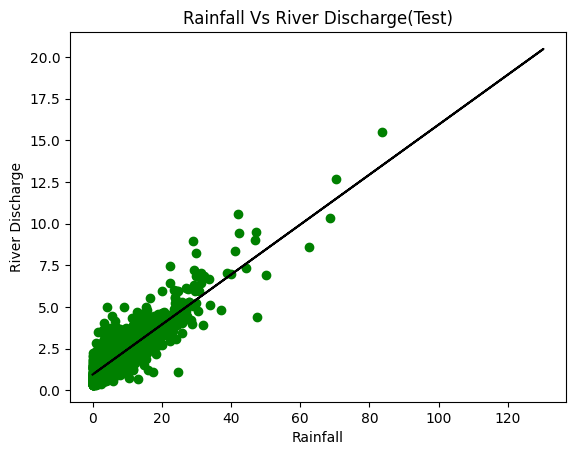

In [29]:
plt.scatter(X_test, Y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Rainfall Vs River Discharge(Test)')
plt.xlabel('Rainfall')
plt.ylabel('River Discharge')
plt.show()

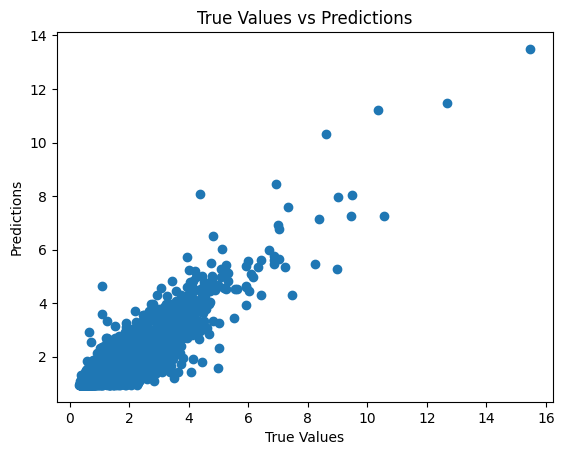

In [30]:
plt.scatter(Y_test, Y_predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [31]:
from sklearn.metrics import r2_score
r2_linear=r2_score(Y_test, Y_predict)
print(r2_linear)

0.771141185524505


# SVM model

In [32]:
from sklearn.preprocessing import StandardScaler
sc_x_train= StandardScaler()
sc_y_train = StandardScaler()
sc_x_test= StandardScaler()
sc_y_test = StandardScaler()
sc_x= StandardScaler()
sc_y = StandardScaler()
x_train = sc_x_train.fit_transform(X_train)
y_train = sc_y_train.fit_transform(Y_train)
x_test = sc_x_test.fit_transform(X_test)
y_test = sc_y_test.fit_transform(Y_test)
x = sc_x.fit_transform(X)
y = sc_y.fit_transform(Y)


In [33]:

print(x)
print(y)


[[ 1.13601636]
 [ 0.13763192]
 [ 2.12330764]
 ...
 [-0.79419357]
 [-0.70544828]
 [ 0.40386777]]
[[ 0.24267982]
 [ 0.17871168]
 [ 1.24058281]
 ...
 [-0.46096972]
 [-0.68485821]
 [-0.53773149]]


In [34]:
from sklearn.svm import SVR
regsvr = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
regsvr.fit(x, y)
regsvr1 = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
regsvr1.fit(x_train, y_train)


c:\Users\rushn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rushn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=0.1)

In [35]:

y_pred_svr = regsvr1.predict(sc_x.transform(x_test)).reshape(-1,1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1))


[[-0.97 -0.52]
 [-0.67  0.64]
 [-0.87  0.56]
 ...
 [-0.72  0.9 ]
 [-0.81 -0.55]
 [-0.59  1.01]]


C:\Users\rushn\AppData\Local\Temp\ipykernel_8052\155053352.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)


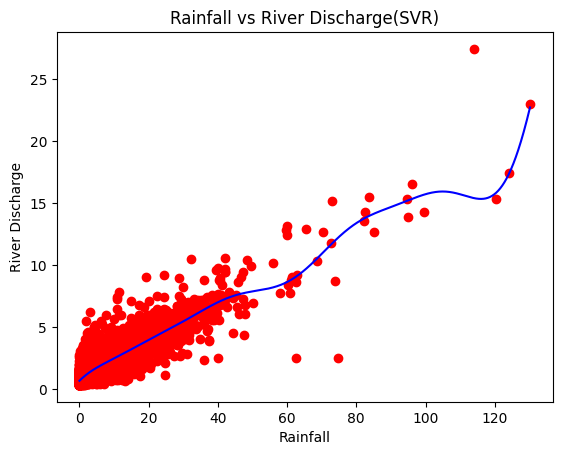

In [36]:
X_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regsvr.predict(sc_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Rainfall vs River Discharge(SVR)')
plt.xlabel('Rainfall')
plt.ylabel('River Discharge')
plt.show()


In [37]:
from sklearn.metrics import r2_score
r2_svr = r2_score(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred_svr))
print(r2_svr)

-0.5832659927128543


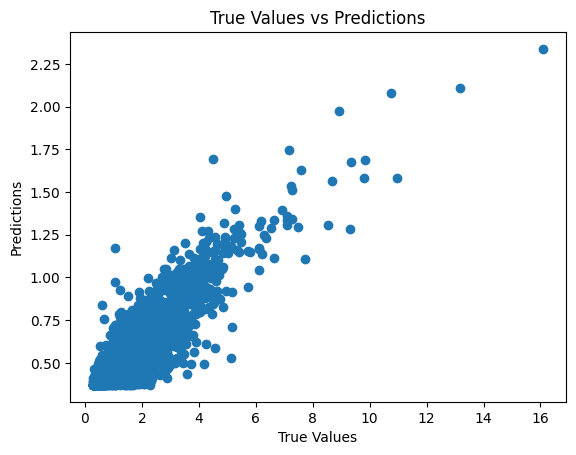

In [38]:
plt.scatter(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred_svr))
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

# Decision Tree Regression Model: Training and testing

In [39]:
from sklearn.tree import DecisionTreeRegressor
regressorDT = DecisionTreeRegressor(random_state = 5)
regressorDT.fit(X, Y)

DecisionTreeRegressor(random_state=5)

In [40]:
regressorDT1 = DecisionTreeRegressor(random_state = 5)
regressorDT1.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=5)

Predicting

In [41]:
Y_pred_DT = regressorDT1.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred_DT.reshape(len(Y_pred_DT),1), Y_test.reshape(len(Y_test),1)),1))

[[1.58 1.26]
 [3.75 3.  ]
 [2.31 2.87]
 ...
 [3.3  3.38]
 [2.51 1.22]
 [4.48 3.55]]


C:\Users\rushn\AppData\Local\Temp\ipykernel_8052\383667572.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


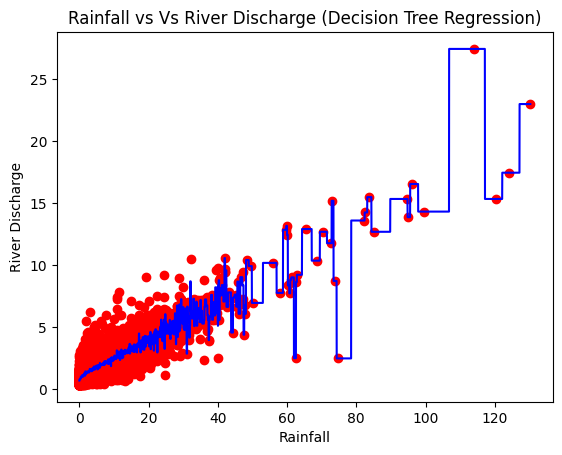

In [42]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressorDT.predict(X_grid), color = 'blue')
plt.title('Rainfall vs Vs River Discharge (Decision Tree Regression)')
plt.xlabel('Rainfall')
plt.ylabel('River Discharge')
plt.show()

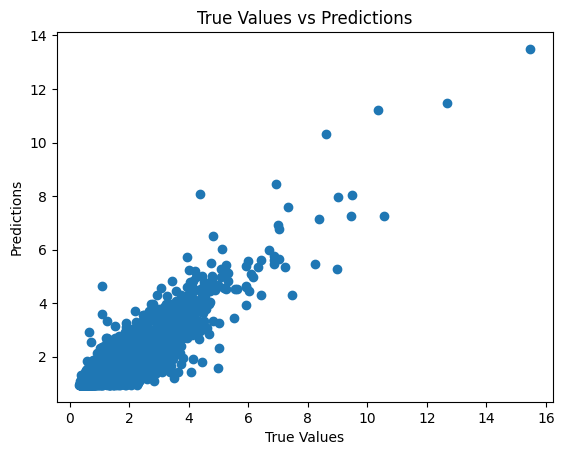

In [43]:
plt.scatter(Y_test, Y_predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [44]:
from sklearn.metrics import r2_score
r2_DT=r2_score(Y_test, Y_pred_DT)
print(r2_DT)

0.7344634285203262


# Random Forest Regression Model: Training and Testing

In [45]:
from sklearn.ensemble import RandomForestRegressor
regressorRT = RandomForestRegressor(n_estimators=50, random_state=5)
regressorRT.fit(X, Y)

c:\Users\rushn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=50, random_state=5)

In [46]:
regressorRT1 = RandomForestRegressor( random_state = 4)
regressorRT1.fit(X_train, Y_train)

c:\Users\rushn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=4)

Predicting

In [47]:
Y_pred_RT = regressorRT1.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred_RT.reshape(len(Y_pred_RT),1), Y_test.reshape(len(Y_test),1)),1))

[[1.58 1.26]
 [3.76 3.  ]
 [2.31 2.87]
 ...
 [3.29 3.38]
 [2.53 1.22]
 [4.54 3.55]]


Visualising the Random Forest Regression results 

C:\Users\rushn\AppData\Local\Temp\ipykernel_8052\4009182080.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


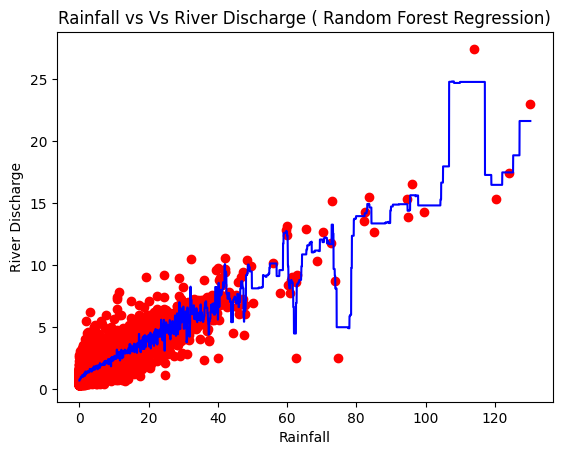

In [48]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressorRT.predict(X_grid), color = 'blue')
plt.title('Rainfall vs Vs River Discharge ( Random Forest Regression)')
plt.xlabel('Rainfall')
plt.ylabel('River Discharge')
plt.show()

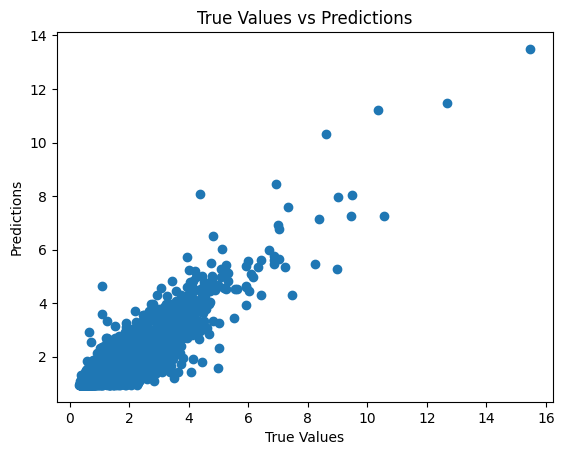

In [49]:
plt.scatter(Y_test, Y_predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [50]:
from sklearn.metrics import r2_score
r2_RT=r2_score(Y_test, Y_pred_RT)
print(r2_RT)

0.7519616464094578


# Predicting Flood

In [51]:
# if average river discharge is above 2.060624 then there will be flood

In [52]:
Rainfall_ipt=75.8

In [53]:
predicted_riverlevel1 = regressor.predict([[Rainfall_ipt]])
print(predicted_riverlevel1)

[[12.31]]


In [54]:
predicted_riverlevel3 = sc_y.inverse_transform(regsvr.predict(sc_x.transform([[Rainfall_ipt]])).reshape(-1,1))
print (predicted_riverlevel3)

[[12.47]]


In [55]:
predicted_riverlevel4 = regressorDT.predict([[Rainfall_ipt]])
print(predicted_riverlevel4)

[2.46]


In [56]:
predicted_riverlevel5 = regressorRT.predict([[Rainfall_ipt]])
print(predicted_riverlevel5)

[4.98]


In [57]:
if (predicted_riverlevel1 > 2.060624):
  print("Linear Regression: FLOOD",predicted_riverlevel1,"r2_score",r2_linear )
else:
  print("Linear Regression: NO FLOOD",predicted_riverlevel1,"r2_score",r2_linear
)

if (predicted_riverlevel3 > 2.060624):
  print("Supported Vector Regression: FLOOD",predicted_riverlevel3,"r2_score",r2_svr)
else:
  print("Supported Vector Regression: NO FLOOD",predicted_riverlevel3,"r2_score",r2_svr
)
if (predicted_riverlevel4 > 2.060624):
  print("Decision Tree Regression: FLOOD",predicted_riverlevel4,"r2_score",r2_DT
)
else:
  print("Decision Tree Regression: NO FLOOD",predicted_riverlevel4,"r2_score",r2_DT
)
if (predicted_riverlevel5 > 2.060624):
  print("Random Forest Regression: FLOOD",predicted_riverlevel5,"r2_score",r2_RT
)
else:
  print("Random Forest Regression: NO FLOOD",predicted_riverlevel5,"r2_score",r2_RT
)


Linear Regression: FLOOD [[12.31]] r2_score 0.771141185524505
Supported Vector Regression: FLOOD [[12.47]] r2_score -0.5832659927128543
Decision Tree Regression: FLOOD [2.46] r2_score 0.7344634285203262
Random Forest Regression: FLOOD [4.98] r2_score 0.7519616464094578
